### 1. Carga y Exploración del Dataset
**Primero, necesitamos cargar el dataset y realizar una exploración básica para entender su estructura y contenido.**

En este caso como el archivo era muy pesado para Github tuvimos que subirlo a la plataforma estando comprimido por lo que a continuacion cargaremos el dataset con un codigo que permite descargar el archivo.zip y luego descomprimirlo.

In [1]:
import requests

# URL del archivo ZIP en GitHub
url = 'https://github.com/tiripitipi/Disneyland-Reviews/raw/main/Disneylandreviews.zip'

# Realizar la solicitud GET para obtener el archivo
response = requests.get(url)

# Guardar el archivo ZIP localmente
with open('Disneylandreviews.zip', 'wb') as f:
    f.write(response.content)


In [2]:
import zipfile

# Descomprimir el archivo ZIP
with zipfile.ZipFile('Disneylandreviews.zip', 'r') as zip_ref:
    zip_ref.extractall('Disneylandreviews')


Realizamos una exploración muy basica para entender el contenido del Dataset

In [3]:
import pandas as pd

# Leer el archivo CSV extraído
df = pd.read_csv('Disneylandreviews/DisneylandReviews.csv', encoding='ISO-8859-1')  # Ajusta la codificación si es necesario

# Mostrar las primeras filas del DataFrame
print(df.head())




   Review_ID  Rating Year_Month     Reviewer_Location  \
0  670772142       4     2019-4             Australia   
1  670682799       4     2019-5           Philippines   
2  670623270       4     2019-4  United Arab Emirates   
3  670607911       4     2019-4             Australia   
4  670607296       4     2019-4        United Kingdom   

                                         Review_Text               Branch  
0  If you've ever been to Disneyland anywhere you...  Disneyland_HongKong  
1  Its been a while since d last time we visit HK...  Disneyland_HongKong  
2  Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong  
3  HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong  
4  the location is not in the city, took around 1...  Disneyland_HongKong  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB
None


In [5]:
print(df.describe())

          Review_ID        Rating
count  4.265600e+04  42656.000000
mean   3.188553e+08      4.217695
std    1.657092e+08      1.063371
min    1.398724e+06      1.000000
25%    1.743274e+08      4.000000
50%    2.907583e+08      5.000000
75%    4.489579e+08      5.000000
max    6.708014e+08      5.000000


**Análisis Inicial**

Revisamos los valores nulos y vemos la distribución de las reseñas. 

In [6]:
# Verificar valores nulos
print(df.isnull().sum())

# Distribución de calificaciones
print(df['Rating'].value_counts())

# Distribución por sucursal
print(df['Branch'].value_counts())


Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
dtype: int64
Rating
5    23146
4    10775
3     5109
2     2127
1     1499
Name: count, dtype: int64
Branch
Disneyland_California    19406
Disneyland_Paris         13630
Disneyland_HongKong       9620
Name: count, dtype: int64


In [7]:
print(df.columns)



Index(['Review_ID', 'Rating', 'Year_Month', 'Reviewer_Location', 'Review_Text',
       'Branch'],
      dtype='object')


### 2. Preprocesamiento de Datos
**Limpieza de Datos**

In [8]:
# Eliminar filas con valores nulos
df = df.dropna()

# Verificar nuevamente valores nulos
print(df.isnull().sum())



Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
dtype: int64


Aunque ya habiamos visto que el Dataset no tenia valores nulos decidimos dejar este codigo de igual manera en caso de usar otro dataset.

**Conversión de Tipos de Datos**

Nos aseguramos de que las columnas tengan el tipo de dato correcto.

In [9]:
# Mostrar valores únicos en la columna 'Year_Month' para identificar los no válidos
print(df['Year_Month'].unique())


['2019-4' '2019-5' '2019-3' '2018-9' '2019-1' '2018-11' '2018-12' '2018-6'
 '2019-2' '2018-10' '2018-8' '2018-5' '2018-4' '2018-7' '2018-3' '2018-2'
 'missing' '2018-1' '2017-12' '2017-11' '2017-6' '2017-10' '2017-9'
 '2017-8' '2017-7' '2017-5' '2017-4' '2017-3' '2017-2' '2017-1' '2016-12'
 '2016-11' '2016-10' '2016-9' '2016-8' '2016-7' '2016-6' '2016-5' '2016-4'
 '2016-3' '2016-2' '2016-1' '2015-12' '2015-11' '2015-10' '2015-9'
 '2015-8' '2015-7' '2015-6' '2015-5' '2015-4' '2015-3' '2015-2' '2015-1'
 '2014-12' '2014-11' '2014-10' '2014-9' '2014-8' '2014-7' '2014-6'
 '2014-5' '2014-4' '2014-3' '2014-2' '2014-1' '2013-12' '2013-11'
 '2013-10' '2013-9' '2013-8' '2013-7' '2013-6' '2013-5' '2013-4' '2013-3'
 '2013-2' '2013-1' '2012-12' '2012-11' '2012-10' '2012-9' '2012-8'
 '2012-7' '2012-6' '2012-5' '2012-4' '2012-3' '2012-2' '2012-1' '2011-12'
 '2011-11' '2011-10' '2011-9' '2011-8' '2011-7' '2011-6' '2011-5' '2011-4'
 '2011-3' '2011-2' '2011-1' '2010-12' '2010-11' '2010-10' '2010-9'
 '20

In [10]:
# Reemplazar valores no válidos por NaN
df['Year_Month'] = df['Year_Month'].replace("missing", pd.NaT)


In [11]:
# Convertir 'Year_Month' a tipo fecha
df['Year_Month'] = pd.to_datetime(df['Year_Month'], format='%Y-%m')

# Verificar tipos de datos
print(df.dtypes)


Review_ID                     int64
Rating                        int64
Year_Month           datetime64[ns]
Reviewer_Location            object
Review_Text                  object
Branch                       object
dtype: object


In [12]:
# Mostrar cualquier valor no convertido correctamente
print(df[df['Year_Month'].isna()])


       Review_ID  Rating Year_Month Reviewer_Location  \
269    647038712       4        NaT       Philippines   
282    646466731       3        NaT         Singapore   
622    620580249       3        NaT            Canada   
5347   318799221       4        NaT         Australia   
5799   284745152       5        NaT       Philippines   
...          ...     ...        ...               ...   
42651    1765031       5        NaT    United Kingdom   
42652    1659553       5        NaT            Canada   
42653    1645894       5        NaT      South Africa   
42654    1618637       4        NaT     United States   
42655    1536786       4        NaT    United Kingdom   

                                             Review_Text               Branch  
269    The first thing on our agenda when we finished...  Disneyland_HongKong  
282    Brought mum for the first time to Disneyland w...  Disneyland_HongKong  
622    I have been to Tokyo and LA Disneyland!I also ...  Disneyland_HongKo

### 3. Análisis de Datos Exploratorio (EDA)
**Análisis Temporal**

Exploramos cómo varían las calificaciones a lo largo del tiempo.

C:\Users\KAGA6\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KAGA6\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


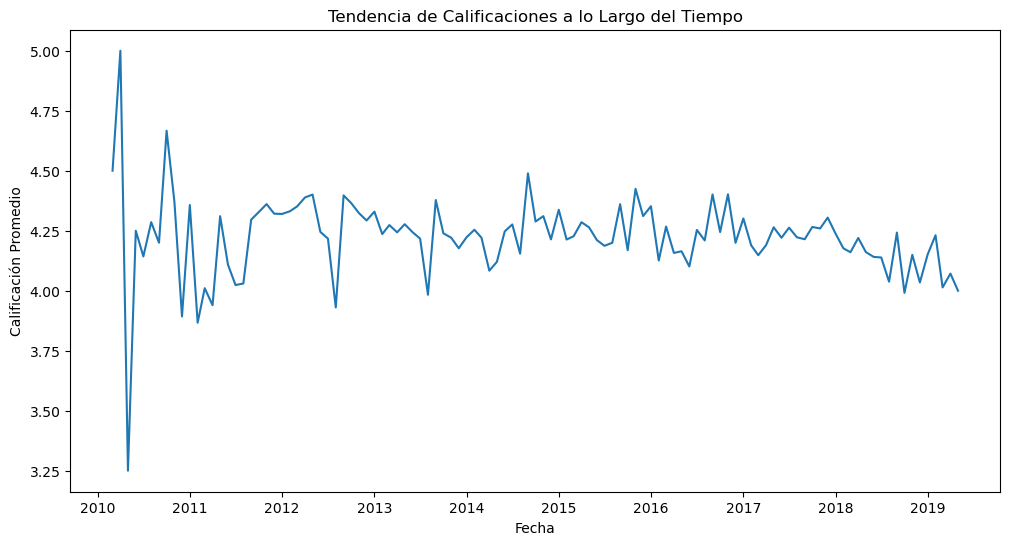

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por mes y calcular la media de calificaciones
rating_trend = df.groupby('Year_Month')['Rating'].mean()

# Graficar la tendencia de calificaciones
plt.figure(figsize=(12,6))
sns.lineplot(x=rating_trend.index, y=rating_trend.values)
plt.title('Tendencia de Calificaciones a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Calificación Promedio')
plt.show()


Pareciera que con el paso del tiempo las calificaciones se van volviendo mas regulares sin tanta variacion entre ellas, aunque aun se pueden ver picos altos y bajos probablemente debido a fechas donde hay algun evento especial (picos altos) y fechas donde no hay ningun evento (picos bajos)

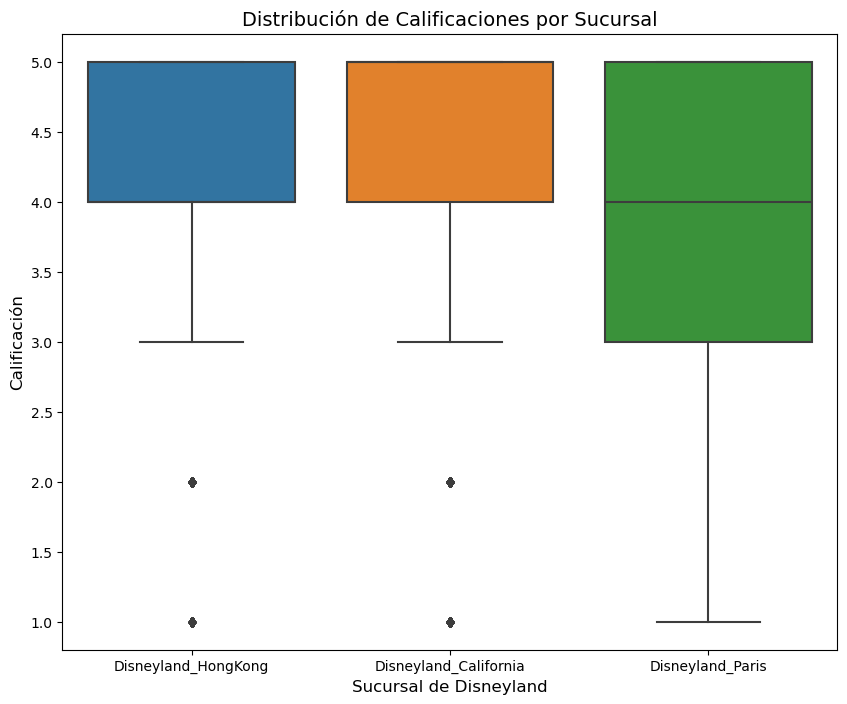

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura con un tamaño de 8x6 pulgadas
plt.figure(figsize=(10, 8))

# Crear el boxplot
sns.boxplot(
    x='Branch',       # Variable en el eje x (Sucursal)
    y='Rating',       # Variable en el eje y (Calificación)
    data=df            # DataFrame que contiene los datos
)

# Añadir título al gráfico
plt.title('Distribución de Calificaciones por Sucursal', fontsize=14)

# Etiquetar el eje x
plt.xlabel('Sucursal de Disneyland', fontsize=12)

# Etiquetar el eje y
plt.ylabel('Calificación', fontsize=12)

# Mostrar el gráfico
plt.show()



Podemos ver que las sucursales de HongKong y California tienen calificaciones practicamente identicas y la sucursal de Paris tiene una mayor variación lo que puede pasar aqui es que la sucursal de Paris es de "peor calidad".

### 4. Procesamiento de Lenguaje Natural (NLP)
**Preprocesamiento de Texto**

Aplicamos técnicas de limpieza y preparación del texto para el análisis.

In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string

# Descargar recursos de NLTK si aún no los tienes
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Inicializar lematizador, stemmer y lista de stopwords
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))  # podemos usar otro idioma dependiendodel texto que utilizemos

def preprocess_text(text, use_stemming=False):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenizar
    tokens = word_tokenize(text)
    # Eliminar stopwords y aplicar lematización o stemming
    if use_stemming:
        tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
    else:
        tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

# Aplicar preprocesamiento al texto de las reseñas
df['Cleaned_Review'] = df['Review_Text'].apply(preprocess_text)
# Si quieres probar el stemming en lugar de lematización, puedes usar:
# df['Cleaned_Review'] = df['Review_Text'].apply(lambda x: preprocess_text(x, use_stemming=True))

print(df['Cleaned_Review'].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KAGA6\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KAGA6\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KAGA6\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    youve ever disneyland anywhere youll find disn...
1    since last time visit hk disneyland yet time s...
2    thanks god hot humid visiting park otherwise w...
3    hk disneyland great compact park unfortunately...
4    location city took around 1 hour kowlon kid li...
Name: Cleaned_Review, dtype: object


**Análisis de Frecuencia de Palabras**

Identificamos las palabras más comunes en las reseñas.

[('park', 54126), ('ride', 51872), ('time', 37973), ('day', 36794), ('disney', 36695), ('disneyland', 33067), ('get', 24030), ('one', 21545), ('go', 20808), ('great', 16317), ('kid', 15904), ('place', 15579), ('would', 14590), ('food', 14365), ('line', 14292), ('year', 13198), ('good', 13129), ('show', 12847), ('queue', 12526), ('really', 12336)]


C:\Users\KAGA6\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


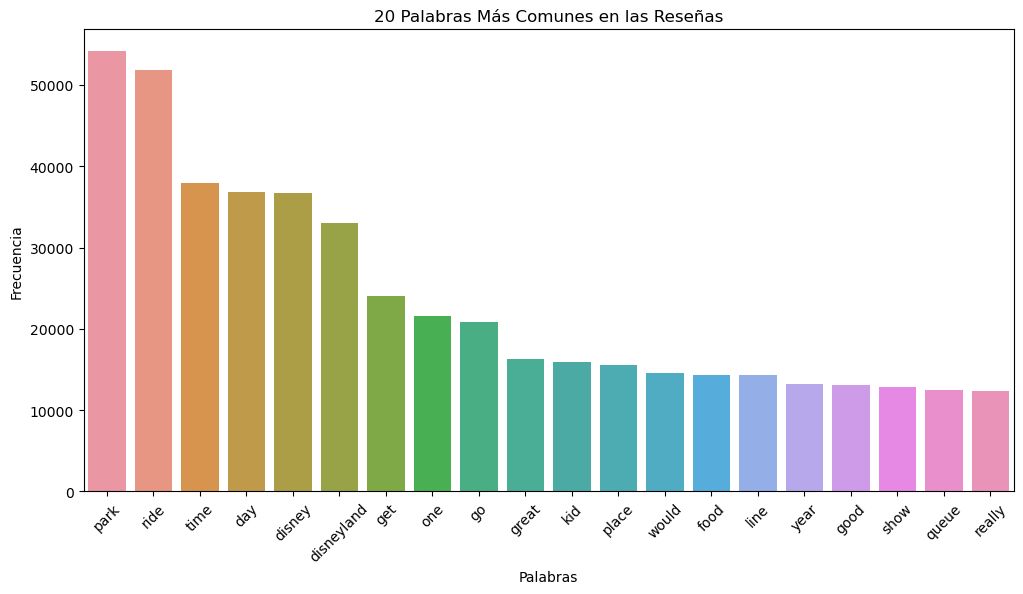

In [16]:
from collections import Counter

# Unir todos los textos preprocesados
all_words = ' '.join(df['Cleaned_Review']).split()

# Contar frecuencia de palabras
word_freq = Counter(all_words)

# Mostrar las 20 palabras más comunes
print(word_freq.most_common(20))

# Graficar las palabras más comunes
common_words = word_freq.most_common(20)
words, counts = zip(*common_words)

plt.figure(figsize=(12,6))
sns.barplot(x=list(words), y=list(counts))
plt.title('20 Palabras Más Comunes en las Reseñas')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


Esto ya nos dice por donde ira el Analisis de sentimientos y por que coincide con las notas del parque.

**Análisis de Sentimiento**

Determinamos el sentimiento de cada reseña basado en la calificación.

Sentiment
Positivo    33921
Neutral      5109
Negativo     3626
Name: count, dtype: int64


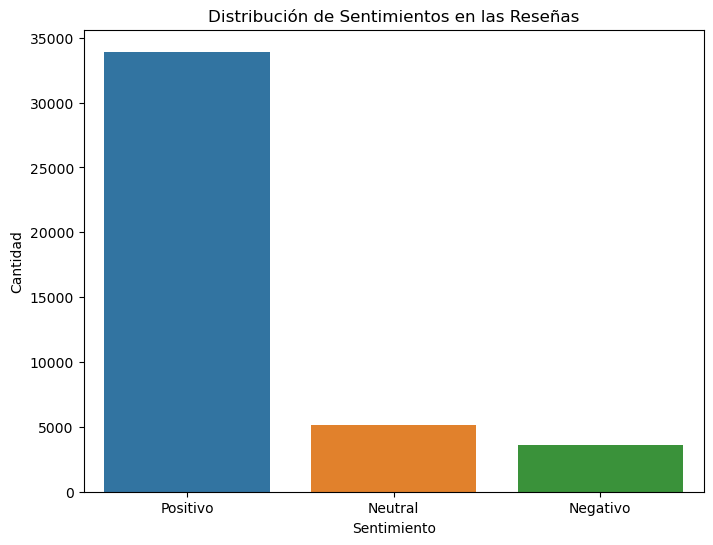

In [17]:
!pip install textblob

from textblob import TextBlob


# Función para determinar el sentimiento
def get_sentiment(rating):
    if rating >=4:
        return 'Positivo'
    elif rating ==3:
        return 'Neutral'
    else:
        return 'Negativo'

# Aplicar la función al dataset
df['Sentiment'] = df['Rating'].apply(get_sentiment)

# Mostrar la distribución de sentimientos
print(df['Sentiment'].value_counts())

# Distribución de sentimientos
plt.figure(figsize=(8,6))
sns.countplot(x='Sentiment', data=df)
plt.title('Distribución de Sentimientos en las Reseñas')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
plt.show()


Vemos una diferencia marcada entre las reseñas positivas y el resto lo que coincide con las calificaciones de las reseñas.

### 5. Vectorización del Texto

Convertimos el texto en una representación numérica para su uso en modelos de aprendizaje automático.

**TF-IDF Vectorizer**

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorizar el texto con TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['Cleaned_Review'])

print(X_tfidf.shape)  # (42000, 5000)

(42656, 5000)


### 6. Construcción de Redes Neuronales (Deep Learning)
**Modelo de Clasificación de Califcaciones**

Construimos un modelo para predecir la calificación basada en el texto de la reseña.

In [19]:
!pip install tensorflow

from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Definir variables
X = X_tfidf
y = df['Rating'] - 1  # Ajustar etiquetas para que empiecen en 0

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir a arrays
X_train = X_train.toarray()
X_test = X_test.toarray()

# One-hot encoding de las etiquetas
y_train_cat = to_categorical(y_train, num_classes=5)
y_test_cat = to_categorical(y_test, num_classes=5)


# Definir el modelo
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(5000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Entrenar el modelo
history = model.fit(X_train, y_train_cat,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

C:\Users\KAGA6\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │       2,560,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,693,125 (10.27 MB)

 Trainable params: 2,693,125 (10.27 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.5464 - loss: 1.1316 - val_accuracy: 0.6252 - val_loss: 0.8636
Epoch 2/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.6629 - loss: 0.7956 - val_accuracy: 0.6264 - val_loss: 0.8518
Epoch 3/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.7241 - loss: 0.6733 - val_accuracy: 0.6173 - val_loss: 0.9018
Epoch 4/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.7909 - loss: 0.5411 - val_accuracy: 0.6142 - val_loss: 0.9896
Epoch 5/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.8688 - loss: 0.3733 - val_accuracy: 0.5922 - val_loss: 1.1081
Epoch 6/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9260 - loss: 0.2351 - val_accuracy: 0.5820 - val_loss: 1.3059
Epoch 7/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9549 - loss: 0.1451 - val_accuracy: 0.5853 - val_loss: 1.5064
Epoch 8/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9684 - loss: 0.1027 - val_accu

**Evaluación del Modelo**

267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5722 - loss: 1.9359
Precisión en el conjunto de prueba: 0.5760665535926819


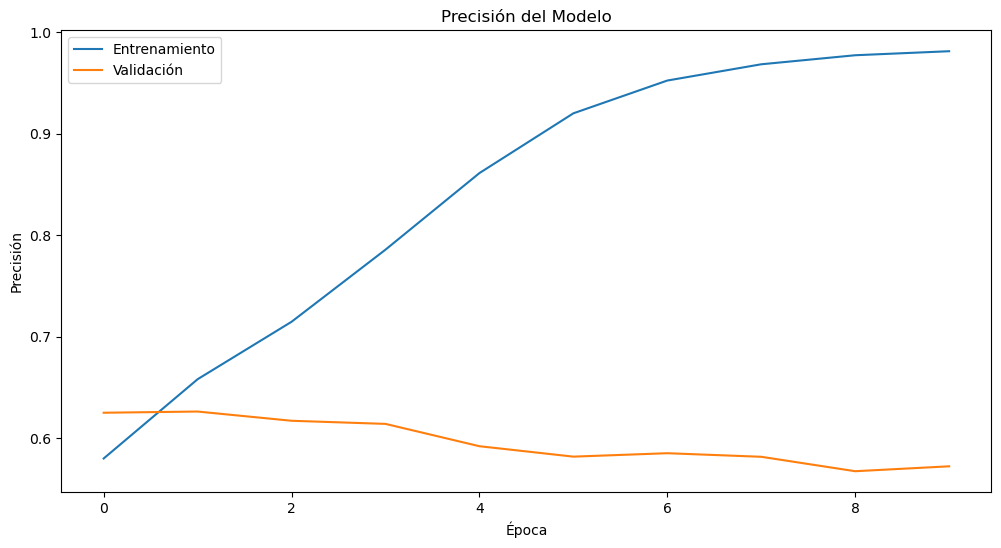

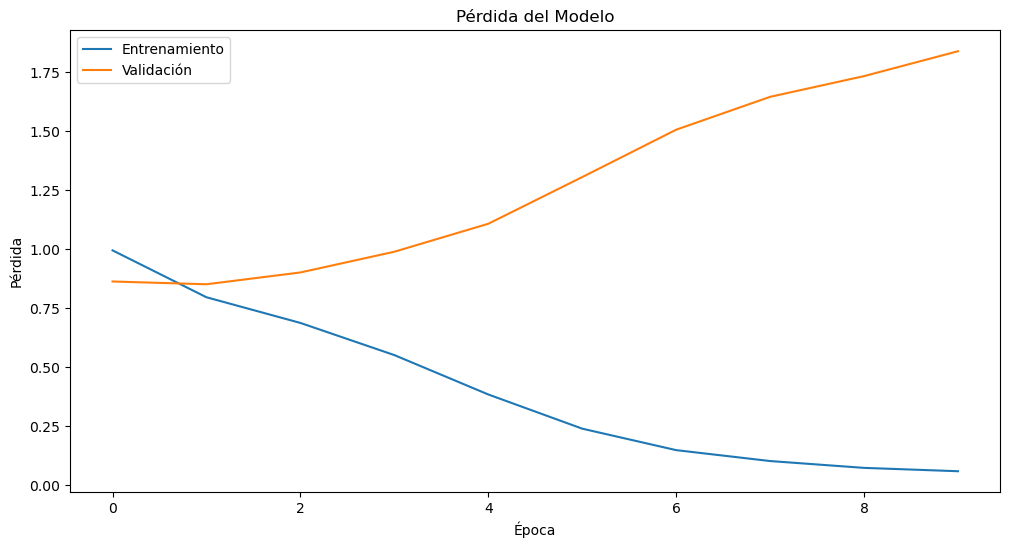

In [20]:
# Evaluar en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f'Precisión en el conjunto de prueba: {test_acc}')

# Graficar la precisión
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar la pérdida
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


**Gráfica de Precisión:**

Precisión de Entrenamiento (línea azul): La precisión sube continuamente hasta llegar cerca de 1.0, lo que sugiere que el modelo está sobreajustando al conjunto de entrenamiento.
Precisión de Validación (línea naranja): La precisión de validación se mantiene baja y no mejora, lo que indica problemas de generalización.

**Gráfica de Pérdida:**

Pérdida de Entrenamiento (línea azul): La pérdida disminuye continuamente, lo cual es esperado y muestra que el modelo está aprendiendo en el conjunto de entrenamiento.
Pérdida de Validación (línea naranja): La pérdida de validación empieza a aumentar a partir de las primeras épocas. Este comportamiento sugiere un sobreajuste del modelo. El modelo está aprendiendo a memorizar el conjunto de entrenamiento pero no está generalizando bien en los datos de validación.

**Mejora del Modelo**

Agregar más capas o ajustar hiperparámetros para mejorar el rendimiento.

In [21]:
# Definir un modelo más complejo
model_improved = models.Sequential()
model_improved.add(layers.Dense(1024, activation='relu', input_shape=(5000,)))
model_improved.add(layers.Dropout(0.5))
model_improved.add(layers.Dense(512, activation='relu'))
model_improved.add(layers.Dropout(0.5))
model_improved.add(layers.Dense(256, activation='relu'))
model_improved.add(layers.Dropout(0.5))
model_improved.add(layers.Dense(5, activation='softmax'))

# Compilar el modelo mejorado
model_improved.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Resumen del modelo mejorado
model_improved.summary()

# Entrenar el modelo mejorado
history_improved = model_improved.fit(X_train, y_train_cat,
                                      epochs=20,
                                      batch_size=128,
                                      validation_split=0.2)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 1024)                │       5,121,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,778,437 (22.04 MB)

 Trainable params: 5,778,437 (22.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - accuracy: 0.5534 - loss: 1.0924 - val_accuracy: 0.6142 - val_loss: 0.8672
Epoch 2/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 14s 67ms/step - accuracy: 0.6646 - loss: 0.7798 - val_accuracy: 0.6281 - val_loss: 0.8688
Epoch 3/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 16s 73ms/step - accuracy: 0.7504 - loss: 0.6145 - val_accuracy: 0.6076 - val_loss: 0.9576
Epoch 4/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step - accuracy: 0.8574 - loss: 0.3937 - val_accuracy: 0.5952 - val_loss: 1.2513
Epoch 5/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 16s 76ms/step - accuracy: 0.9224 - loss: 0.2131 - val_accuracy: 0.5833 - val_loss: 1.5083
Epoch 6/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - accuracy: 0.9465 - loss: 0.1472 - val_accuracy: 0.5681 - val_loss: 1.7848
Epoch 7/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - accuracy: 0.9608 - loss: 0.1099 - val_accuracy: 0.5783 - val_loss: 1.8714
Epoch 8/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.9726 - loss: 0.0796 - 

**Evaluación del Modelo Mejorado**

In [22]:
# Evaluar en el conjunto de prueba
test_loss_improved, test_acc_improved = model_improved.evaluate(X_test, y_test_cat)
print(f'Precisión en el conjunto de prueba (Mejorado): {test_acc_improved}')

# Comparar con el modelo anterior
if test_acc_improved > test_acc:
    print("El modelo mejorado tiene una mejor precisión.")
else:
    print("El modelo mejorado no supera la precisión del modelo anterior.")


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5814 - loss: 2.4942
Precisión en el conjunto de prueba (Mejorado): 0.5843881964683533
El modelo mejorado tiene una mejor precisión.


El modelo mejorado apenas tiene una mejor precisión

### 7. Proyecto Final: Profundización

**Profundizar en NLP**

##### Análisis de Sentimiento Avanzado con VADER

VADER es un analizador de sentimientos que funciona bien con textos informales como reseñas y publicaciones en redes sociales.

**Implementación de VADER**

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\KAGA6\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


VADER_Sentiment_Label
Positivo    37666
Negativo     4271
Neutral       719
Name: count, dtype: int64


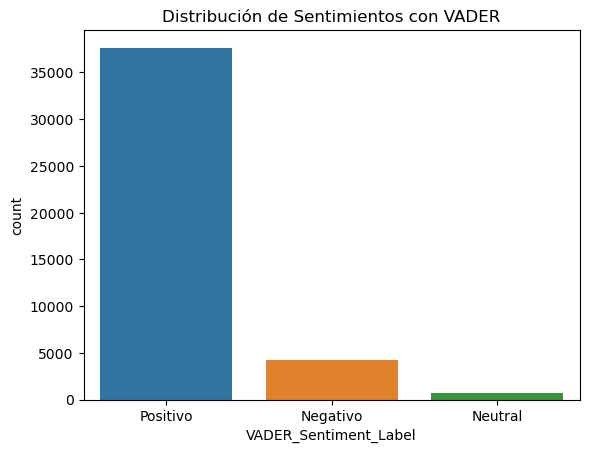

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Descargar el recurso VADER si aún no lo tienes
nltk.download('vader_lexicon')

# Inicializar el analizador VADER
vader = SentimentIntensityAnalyzer()

# Aplicar análisis de sentimiento con VADER
df['VADER_Sentiment'] = df['Review_Text'].apply(lambda x: vader.polarity_scores(x)['compound'])

# Clasificar el sentimiento en positivo, negativo o neutral
df['VADER_Sentiment_Label'] = df['VADER_Sentiment'].apply(lambda x: 'Positivo' if x >= 0.05 else ('Negativo' if x <= -0.05 else 'Neutral'))

# Mostrar la distribución de sentimientos
print(df['VADER_Sentiment_Label'].value_counts())

# Graficar la distribución
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='VADER_Sentiment_Label', data=df)
plt.title('Distribución de Sentimientos con VADER')
plt.show()



Podemos ver que la cantidad de comentarios tomados como neutrales baja considerablemente hasta ser menores que los comentarios negativos.

##### Topic Modeling con LDA (Latent Dirichlet Allocation)

LDA es una técnica de modelado de temas que puede ayudarnos a identificar temas subyacentes en las reseñas.

**Implementación de LDA**

In [24]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Vectorizar el texto usando CountVectorizer
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
count_data = count_vectorizer.fit_transform(df['Cleaned_Review'])

# Definir el modelo LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(count_data)

# Mostrar los temas principales
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Mostrar los temas
display_topics(lda, count_vectorizer.get_feature_names_out(), 10)


Topic 0:
day ride time kid park disneyland parade great place disney
Topic 1:
ride mountain park time disneyland space great place pirate day
Topic 2:
park time day ride line disneyland pas disney fast wait
Topic 3:
disney park disneyland world ride hong kong like attraction small
Topic 4:
park ride disney queue time day food hotel hour staff


##### Word Embeddings con Word2Vec

Word2Vec convierte palabras en vectores de alta dimensión que capturan el contexto en el que se utilizan las palabras.

**Implementación de Word2Vec**

In [25]:
!pip install gensim
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')

# Tokenizar el texto en oraciones
sentences = df['Cleaned_Review'].apply(nltk.word_tokenize).tolist()

# Entrenar el modelo Word2Vec
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

# Ver palabras más similares a "disney"
similar_words = word2vec_model.wv.most_similar('disney')
print(similar_words)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KAGA6\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('disneyland', 0.6260316371917725), ('dl', 0.4618007242679596), ('avid', 0.4425143301486969), ('fl', 0.42414146661758423), ('orlando', 0.4235399663448334), ('unlike', 0.4188317358493805), ('dlp', 0.407174676656723), ('familiar', 0.4060070514678955), ('comparing', 0.39738553762435913), ('original', 0.39654314517974854)]


##### Aplicación de TF-IDF y Análisis de Correlación

TF-IDF es útil para identificar las palabras más relevantes en un documento. Podemos correlacionar estas características con la calificación (Rating).

In [26]:
import time
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

start_time = time.time()

# Vectorizar el texto con TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000) #Se redujo el numero de caracteristicas por que el proceso era demasiado lento, puedes subirlo a 5000 si tu pc lo permite
X_tfidf = tfidf_vectorizer.fit_transform(df['Cleaned_Review'])

print(f"TF-IDF vectorization took {time.time() - start_time} seconds.")

# Convertir a DataFrame para análisis
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(f"DataFrame creation took {time.time() - start_time} seconds.")

# Añadir las calificaciones para correlación
df_tfidf['Rating'] = df['Rating']

# Calcular la correlación entre las palabras y la calificación
correlation = df_tfidf.corr()['Rating'].sort_values(ascending=False)
print(correlation.head(10))  # Las palabras más correlacionadas con calificaciones altas
print(correlation.tail(10))  # Las palabras más correlacionadas con calificaciones bajas


TF-IDF vectorization took 2.063476324081421 seconds.
DataFrame creation took 2.15496826171875 seconds.
Rating       1.000000
great        0.142997
amazing      0.140776
loved        0.126274
love         0.107949
fun          0.096216
magical      0.092927
always       0.091142
fantastic    0.091024
wonderful    0.090376
Name: Rating, dtype: float64
queue          -0.137450
disappointed   -0.146938
waste          -0.157854
people         -0.166470
poor           -0.166664
told           -0.167300
rude           -0.171272
closed         -0.179169
hour           -0.190540
money          -0.197803
Name: Rating, dtype: float64


Aqui podemos ver las palabras correlacionadas con calificaciones mas altas y bajas respectivamente

**Profundizar en Deep Learning**

Queriamos tambien profundizar en Deep Learning aunque no era necesario pero nos topamos con dos problemas.
Primero implementamos una una RNN (Red Neuronal Recurrente) con LSTM, pero los resultados no variaron mucho del modelo anteriormente realizado.
Segundo intentamos realizar Transfer Learning con BERT, pero no fue posible ya que hubo un error con Windows que no se pudo solucionar (lo dejare expresado igualmente aunque no de un resultado.



##### Preparación de Datos para RNN

In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenizar el texto
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['Cleaned_Review'])

X_seq = tokenizer.texts_to_sequences(df['Cleaned_Review'])
X_pad = pad_sequences(X_seq, maxlen=100)  # Truncar o rellenar a 100 palabras

# Preparar etiquetas
y = df['Rating'] - 1  # Ajustar etiquetas para que empiecen en 0

# Dividir en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)


##### Construcción del Modelo LSTM

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Definir el modelo LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model_lstm.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dense(5, activation='softmax'))

# Compilar el modelo
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_lstm = model_lstm.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)


C:\Users\KAGA6\miniconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
214/214 ━━━━━━━━━━━━━━━━━━━━ 27s 117ms/step - accuracy: 0.5404 - loss: 1.1726 - val_accuracy: 0.6019 - val_loss: 0.9216
Epoch 2/5
214/214 ━━━━━━━━━━━━━━━━━━━━ 24s 111ms/step - accuracy: 0.6232 - loss: 0.8837 - val_accuracy: 0.6066 - val_loss: 0.8862
Epoch 3/5
214/214 ━━━━━━━━━━━━━━━━━━━━ 23s 109ms/step - accuracy: 0.6503 - loss: 0.8086 - val_accuracy: 0.6144 - val_loss: 0.9007
Epoch 4/5
214/214 ━━━━━━━━━━━━━━━━━━━━ 22s 105ms/step - accuracy: 0.6710 - loss: 0.7690 - val_accuracy: 0.6138 - val_loss: 0.8990
Epoch 5/5
214/214 ━━━━━━━━━━━━━━━━━━━━ 22s 102ms/step - accuracy: 0.7009 - loss: 0.7238 - val_accuracy: 0.6018 - val_loss: 0.9370


In [29]:
# Evaluar el modelo LSTM
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test, y_test)
print(f'Precisión del modelo LSTM: {accuracy_lstm}')

267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6023 - loss: 0.9668
Precisión del modelo LSTM: 0.5991561412811279


Podemos ver que la precision no cambia mucho con relacion al modelo ya ocupado anteriormente.

##### Transfer Learning con BERT

BERT es un modelo preentrenado en grandes corpus de datos y puede aplicarse a tareas de clasificación de texto.

**Implementación de BERT para Clasificación**

In [30]:
!pip install transformers

from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam

# Inicializar el tokenizador de BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenizar el texto
X_bert = tokenizer(df['Cleaned_Review'].tolist(), max_length=100, padding=True, truncation=True, return_tensors='tf')

# Definir el modelo BERT
model_bert = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=5)

# Compilar el modelo
model_bert.compile(optimizer=Adam(learning_rate=2e-5), loss=model_bert.compute_loss, metrics=['accuracy'])

# Entrenar el modelo BERT
history_bert = model_bert.fit([X_bert['input_ids'], X_bert['attention_mask']], y_train, epochs=3, batch_size=16, validation_split=0.1)


OSError: [WinError 126] No se puede encontrar el módulo especificado. Error loading "C:\Users\KAGA6\miniconda3\Lib\site-packages\torch\lib\fbgemm.dll" or one of its dependencies.

In [ ]:
# Evaluar el modelo BERT
X_bert_test = tokenizer(df['Cleaned_Review'].iloc[X_test.index].tolist(), max_length=100, padding=True, truncation=True, return_tensors='tf')
loss_bert, accuracy_bert = model_bert.evaluate([X_bert_test['input_ids'], X_bert_test['attention_mask']], y_test)
print(f'Precisión del modelo BERT: {accuracy_bert}')

Hemos abarcado desde la carga y limpieza de datos hasta la implementación de modelos avanzados de NLP y Deep Learning. Con mejores resultados en NLP que en Deep learning, pero se puede concluir que la gente tiene una valoracion bastante buena de Disneyland en cualquiera de sus tres sucursales (aunque la sucursal de Paris podria estar levemente peor evaluada) la gran mayoria de reseñas son positivas y se habla principalmente del parque en general y sus atracciones. Los pocos comentarios negativos estan enfocados en el estacionamiento, tiempos de espera y precios. 